In [8]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

#for text processing
import re
import string
import nltk 
from nltk.corpus import stopwords
from textblob import Word

#calculation of time
from time import time

#model for vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#dimensionality reduction
from sklearn.decomposition import PCA

#model for splitting of data
from sklearn.model_selection import train_test_split

#logistic regression algo
from sklearn.linear_model import LogisticRegression

#naive bayes
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

#for k-fold cross validation
from sklearn import model_selection

#svm algo 
from sklearn import svm

# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import classification_report

# hyperparameter training imports
from sklearn.model_selection import GridSearchCV


##pretty print
import pprint as pp

#SMOTE
from imblearn.over_sampling import SMOTE

In [9]:
df = pd.read_csv('enron_cleaned_sent_emails.csv')
df.dtypes

file    object
body    object
dtype: object

In [10]:
df.shape

(126846, 2)

In [11]:
df.head()

,file,body
0,allen-p/_sent_mail/1.,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,"Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"
2,allen-p/_sent_mail/100.,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip"
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.


In [12]:
df.isnull().sum()

file    0
body    0
dtype: int64

### Text Cleanup

In [13]:
def text_preprocessing(data):
    
    #convert text to lower-case
    data['tokenized_text'] = data['body'].apply(lambda x:' '.join(x.lower() for x in x.split()))

    #remove punctuations, unwanted characters
    data['tokenized_text_1']= data['tokenized_text'].apply(lambda x: "".join([char for char in x if char not in string.punctuation]))

    #remove numbers
    data['tokenized_text_2']= data['tokenized_text_1'].apply(lambda x: re.sub('[0-9]+', ' ' , x))

    #remove stopwords
    stop = stopwords.words('english')
    data['tokenized_text_3']= data['tokenized_text_2'].apply(lambda x:' '.join(x for x in x.split() if not x in stop))

    #lemmatization
    data['tokenized_text_4']= data['tokenized_text_3'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    # remove all single characters
    data['tokenized_text_5'] = data['tokenized_text_4'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
    
    #create a final text field to work on
    data['final_text'] = data['tokenized_text_5']

In [14]:
#pre-processing or cleaning data

text_preprocessing(df)

df.head()

,file,body,tokenized_text,tokenized_text_1,tokenized_text_2,tokenized_text_3,tokenized_text_4,tokenized_text_5,final_text
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,here is our forecast,here is our forecast,here is our forecast,forecast,forecast,forecast,forecast
1,allen-p/_sent_mail/10.,"Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n","traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time.",traveling to have a business meeting takes the fun out of the trip especially if you have to prepare a presentation i would suggest holding the business plan meetings here then take a trip without any formal business meetings i would even try and get some honest opinions on whether a trip is even desired or necessary as far as the business meetings i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not too often the presenter speaks and the others are quiet just waiting for their turn the meetings might be better if held in a round table discussion format my suggestion for where to go is austin play golf and rent a ski boat and jet skis flying somewhere takes too much time,traveling to have a business meeting takes the fun out of the trip especially if you have to prepare a presentation i would suggest holding the business plan meetings here then take a trip without any formal business meetings i would even try and get some honest opinions on whether a trip is even desired or necessary as far as the business meetings i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not too often the presenter speaks and the others are quiet just waiting for their turn the meetings might be better if held in a round table discussion format my suggestion for where to go is austin play golf and rent a ski boat and jet skis flying somewhere takes too much time,traveling business meeting takes fun trip especially prepare presentation would suggest holding business plan meetings take trip without formal business meetings would even try get honest opinions whether trip even desired necessary far business meetings think would productive try stimulate discussions across different groups working often presenter speaks others quiet waiting turn meetings might better held round table discussion format suggestion go austin play golf rent ski boat jet skis flying somewhere takes much time,traveling business meeting take fun trip especially prepare presentation would suggest hold

### Extracting names of senders

In [15]:
df['name'] = df['file'].str.split('/').str[0]
#df.head()

In [16]:
sender_names = df['name'].value_counts().sort_values(ascending=False)

### Top 10 email senders

In [17]:
top10_sender_names = sender_names.nlargest(10)
top10_sender_names

mann-k          8926
kaminski-v      8644
dasovich-j      5366
germany-c       5128
shackleton-s    4407
jones-t         4123
bass-e          3030
lenhart-m       2759
beck-s          2674
symes-k         2649
Name: name, dtype: int64

In [18]:
top50_sender_names = sender_names.nlargest(50)

Text(0.5, 1.0, 'Email sent by senders')

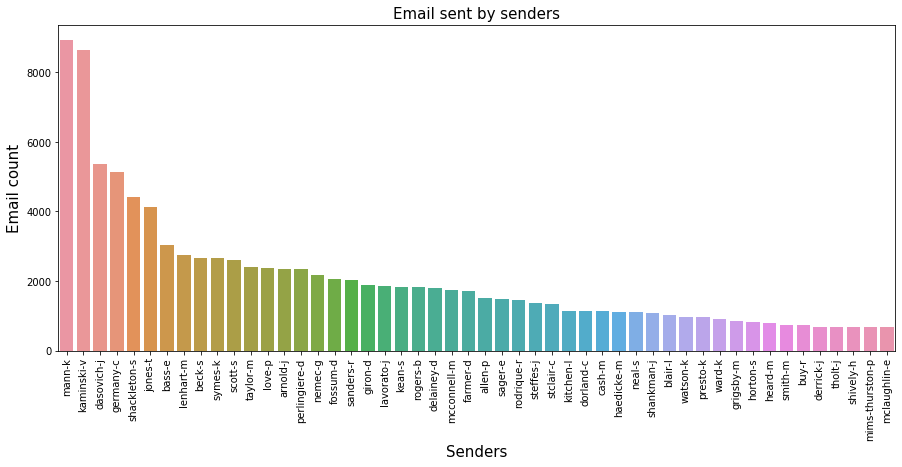

In [19]:
#visualization
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=top50_sender_names.index, y=top50_sender_names)
plt.xlabel('Senders', fontsize=15)
plt.ylabel('Email count', fontsize=15)
plt.title('Email sent by senders', fontsize=15)

In [20]:
smallest20_sender_names = sender_names.nsmallest(20)
smallest20_sender_names

merriss-s         3 
phanis-s          4 
linder-e          6 
meyers-a          11
shapiro-r         13
motley-m          13
bailey-s          14
gilbertsmith-d    15
king-j            19
panus-s           26
benson-r          32
ermis-f           34
holst-k           36
saibi-e           39
griffith-j        40
south-s           42
dean-c            44
slinger-r         48
ring-r            51
donohoe-t         52
Name: name, dtype: int64

In [21]:
def vectorization(data):

#     tf=TfidfVectorizer( min_df=10 
#                        , max_df=0.7
#                        , lowercase=True 
#                        , ngram_range=(0, 2) )
    t0 = time()
    tf=TfidfVectorizer( min_df=.01 , max_df=0.50 , ngram_range=(0, 3))
    tfidf_dtm = tf.fit_transform(data)
    print("done in %0.3fs" % (time() - t0))
    return tfidf_dtm, tf

In [22]:
#build a vector from the txt data

tfidf_dtm , tf = vectorization(df['final_text'])

tfidf_dtm = tfidf_dtm.toarray()
print('Shape of document term matrix : ', tfidf_dtm.shape)

done in 106.783s
Shape of document term matrix :  (126846, 1562)


In [23]:
# df['tfidf'] = list(tfidf_dtm)

### PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca_dtm = pca.fit_transform(tfidf_dtm)
# X_test = pca.transform(X_test)

In [25]:
pca_dtm.shape

(126846, 50)

In [26]:
df['pca'] = list(pca_dtm)

In [27]:
df.head()

,file,body,tokenized_text,tokenized_text_1,tokenized_text_2,tokenized_text_3,tokenized_text_4,tokenized_text_5,final_text,name,pca
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,here is our forecast,here is our forecast,here is our forecast,forecast,forecast,forecast,forecast,allen-p,"[0.007739935306755509, -0.05122229538126113, -0.02141562243615556, 0.0037040000314092375, 0.006407401966227062, -0.017127216451015392, -0.05537375478706523, -0.12876582729991548, -0.01702342403881277, -0.008935827509211224, 0.0034910562177183726, -0.03198606929989334, -0.012443045801105663, -0.011724730870031355, -0.0038656150078212347, -0.015200380420638062, -0.061315684516465956, 0.004868301363930693, -0.005666753357673479, 0.004082103203270727, 0.00044563801587900096, 0.013087801006019077, 0.026025655923041693, 0.013126773564932925, 0.012633190190383736, 0.006405479052157535, -0.010089269629107509, 0.010136850068578002, -0.015668129508939685, -0.0028974688471789956, -0.00851883088846224, -0.011735871455991297, -0.006897641056821461, -0.003320085093036331, -0.015721274515374167, -0.008522307295842768, 0.014726222605968509, 0.0023995001110750113, -0.005974096818587393, -0.0040379255608529825, -0.00445143143950546, 0.0022038565594000954, -0.009251374635883162, -0.018050014293015483, -0.005732189192228861, -0.0006559392687304106, 0.006619233848307995, 0.0008456141108019822, 0.002045289435277127, -0.006136567347617895]"
1,allen-p/_sent_mail/10.,"Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n","traveling to have a business meeting takes the fun out of the trip. especially if you have to prepare a presentation. i would suggest holding the business plan meetings here then take a trip without any formal business meetings. i would even try and get some honest opinions on whether a trip is even desired or necessary. as far as the business meetings, i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. too often the presenter speaks and the others are quiet just waiting for their turn. the meetings might be better if held in a round table discussion format. my suggestion for where to go is austin. play golf and rent a ski boat and jet ski's. flying somewhere takes too much time.",traveling to have a business meeting takes the fun out of the trip especially if you have to prepare a presentation i would suggest holding the business plan meetings here then take a trip without any formal business meetings i would even try and get some honest opinions on whether a trip is even desired or necessary as far as the business meetings i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not too often the presenter speaks and the others are quiet just waiting for their turn the meetings might be better if held in a round table discussion format my suggestion for where to go is austin play golf and rent a ski boat and jet skis flying somewhere takes too much time,traveling to have a business meeting takes the fun out of the trip especially if you have to prepare a presentation i would suggest holding the business plan meetings here then take a trip without any formal business meetings i 

### Split data

In [28]:
def split_data(data, label, test_size):
    
    X = np.array(list(map(np.array, data)))
    y = label

    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=test_size , random_state=42)

    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test  = split_data(df['pca'] , df['name'] , test_size=0.3)

(88792, 50)
(88792,)
(38054, 50)
(38054,)


# SMOTE  
Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [30]:

# from imblearn.over_sampling import SVMSMOTE

# # print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
# # print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# # print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SVMSMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# # print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==2)))
# # print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# # print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


### Sampling of data

In [31]:
# initiaize supervised learning models

def data_sampling(y_train):
    
    #  Calculate the number of samples for 1%, 10%, and 100% of the training data
    #  samples_100 is the entire training set i.e. len(y_train)
    #  samples_10 is 10% of samples_100
    #  samples_1 is 1% of samples_100 
    
    samples = {}
    
    samples['samples_1']   = int(len(y_train)/100)
    samples['samples_10']  = int(len(y_train)*10/100)
    samples['samples_100'] = len(y_train)
    

    print('samples_1   : ', samples['samples_1'])
    print('samples_10  : ', samples['samples_10'])
    print('samples_100 : ', samples['samples_100'])
   
    return samples
          

### Train, Predict and Evaluate Metrics

In [32]:
def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the validation set(X_val),
    start = time() # Get start time
    predictions_val = learner.predict(X_val)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
        
    #Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_val,predictions_val)
    
    #classification report for precision, relcall, f1-score
#     results['f_val'] = classification_report(y_val, predictions_val, target_names=target_names)
    results['f_val'] = classification_report(y_val, predictions_val)
               
    # Success
    print("{} trained on {} samples in {}s time with prediction time {}s .".format(learner.__class__.__name__
                                                                                , sample_size,results['train_time'] 
                                                                                , results['pred_time'] ))
    print()
    print("{} Classification Report ".format(learner.__class__.__name__) )
    print()
    print(results['f_val'] )
    print("Accuracy : ", results['acc_test'])
    print("******************************************************************************************************************")
        
    # Return the results
    return results

### Sampling

In [33]:
# X_train = X_train_res
# y_train = y_train_res

samples = {}

samples = data_sampling(y_train)

print()
print(samples)

samples_1   :  887
samples_10  :  8879
samples_100 :  88792

{'samples_1': 887, 'samples_10': 8879, 'samples_100': 88792}


### Target unique values

In [34]:
target_names = list( df['name']
                   .unique())
#pp.pprint(target_names)
pp.pprint(len(target_names))

149


### Classifiers

In [35]:
clf_A = svm.SVC(kernel='linear' , class_weight = 'balanced')
clf_B = LogisticRegression(multi_class='auto' , random_state=42)
clf_C = MultinomialNB(alpha=1.0)
clf_D = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

print()
pp.pprint(clf_A)
print()
pp.pprint(clf_B)
print()
pp.pprint(clf_C)



SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### LR(default parm), RandomForest, Multinomial(doesn't work on -ve values)

In [36]:
results = {}
for clf in [clf_B,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    for i in samples.values():
        results[clf_name][i] = train_predict(clf, i, X_train, y_train, X_test, y_test)

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 887 samples in 0.4341108798980713s time with prediction time 0.07890200614929199s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.79      0.40      0.53       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.28      0.69      0.40       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      0

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 8879 samples in 8.744186401367188s time with prediction time 0.09408974647521973s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.50      0.07      0.12       473
       arnold-j       0.36      0.42      0.38       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.69      0.67      0.68       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.30      0.77      0.43       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.48      0.20      0.28       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      0

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 88792 samples in 224.9145884513855s time with prediction time 0.09777688980102539s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.50      0.49      0.49       473
       arnold-j       0.43      0.57      0.49       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.63      0.71      0.67       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.39      0.79      0.52       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.44      0.51      0.47       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.60      0.13      0.22       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier trained on 887 samples in 0.4551737308502197s time with prediction time 4.871944427490234s .

RandomForestClassifier Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.79      0.03      0.06       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.00      0.00      0.00       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00 

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier trained on 8879 samples in 4.41886305809021s time with prediction time 6.694739818572998s .

RandomForestClassifier Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.00      0.00      0.00       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.00      0.00      0.00       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00  

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier trained on 88792 samples in 44.505295515060425s time with prediction time 8.062323570251465s .

RandomForestClassifier Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.00      0.00      0.00       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.00      0.00      0.00       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.0

### Logistic Regression after Grid Search

In [37]:
logreg2=LogisticRegression(C=1,penalty="l2")

results = {}
for clf in [logreg2]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    for i in samples.values():
        results[clf_name][i] = train_predict(clf, i, X_train, y_train, X_test, y_test)

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 887 samples in 0.46878862380981445s time with prediction time 0.09371209144592285s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.79      0.40      0.53       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.28      0.69      0.40       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 8879 samples in 16.001776933670044s time with prediction time 0.11860179901123047s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.50      0.07      0.12       473
       arnold-j       0.36      0.42      0.38       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.69      0.67      0.68       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.30      0.77      0.43       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.48      0.20      0.28       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 88792 samples in 237.06599068641663s time with prediction time 0.09773683547973633s .

LogisticRegression Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.50      0.49      0.49       473
       arnold-j       0.43      0.57      0.49       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.63      0.71      0.67       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.39      0.79      0.52       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.44      0.51      0.47       293
      brawner-s       0.00      0.00      0.00       109
          buy-r       0.60      0.13      0.22       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00     

### SVM - Produces good results (better than others)

In [38]:
results = {}
for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    for i in samples.values():
        results[clf_name][i] = train_predict(clf, i, X_train, y_train, X_test, y_test)

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 887 samples in 0.34365105628967285s time with prediction time 10.651819944381714s .

SVC Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.00      0.00      0.00       473
       arnold-j       0.00      0.00      0.00       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.00      0.00        16
       bailey-s       0.00      0.00      0.00         4
         bass-e       0.92      0.25      0.39       893
     baughman-d       0.00      0.00      0.00        32
         beck-s       0.11      0.83      0.20       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.00      0.00      0.00       293
      brawner-s       0.02      0.02      0.02       109
          buy-r       0.00      0.00      0.00       233
     campbell-l       0.00      0.00      0.00       203
       carson-m       0.00      0.00      0.00       135
         cash-m 

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 8879 samples in 19.50966238975525s time with prediction time 109.16343259811401s .

SVC Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.66      0.29      0.40       473
       arnold-j       0.44      0.20      0.27       727
        arora-h       0.00      0.00      0.00        20
       badeer-r       0.00      0.06      0.01        16
       bailey-s       0.05      0.50      0.08         4
         bass-e       0.87      0.45      0.59       893
     baughman-d       0.00      0.03      0.01        32
         beck-s       0.65      0.52      0.58       801
       benson-r       0.00      0.00      0.00         8
        blair-l       0.47      0.29      0.36       293
      brawner-s       0.08      0.18      0.11       109
          buy-r       0.20      0.17      0.18       233
     campbell-l       0.07      0.23      0.10       203
       carson-m       0.02      0.05      0.03       135
         cash-m  

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


SVC trained on 88792 samples in 924.1644868850708s time with prediction time 602.6561586856842s .

SVC Classification Report 

                 precision    recall  f1-score   support

        allen-p       0.74      0.48      0.58       473
       arnold-j       0.55      0.25      0.34       727
        arora-h       0.03      0.20      0.06        20
       badeer-r       0.02      0.12      0.03        16
       bailey-s       0.07      0.50      0.12         4
         bass-e       0.85      0.54      0.66       893
     baughman-d       0.01      0.03      0.01        32
         beck-s       0.69      0.63      0.66       801
       benson-r       0.03      0.25      0.05         8
        blair-l       0.59      0.48      0.53       293
      brawner-s       0.07      0.22      0.11       109
          buy-r       0.35      0.35      0.35       233
     campbell-l       0.15      0.20      0.17       203
       carson-m       0.10      0.14      0.12       135
         cash-m  

## Ensembling Methods

### 1- Voting Ensembling methods

In [40]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn import tree

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# create the sub models
estimators = []
model1 = LogisticRegression(multi_class='auto' , random_state=seed)
estimators.append(('logistic', model1))

model2 = tree.DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = svm.SVC(kernel='linear' , class_weight = 'balanced')
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tshrs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5401613560288524
Wall time: 3h 30min 16s


In [42]:
results

array([0.53558559, 0.53761261, 0.53598378, 0.53823629, 0.54161505,
       0.54893569, 0.53023989, 0.54398018, 0.54105192, 0.54837256])

### 2- Stacking enembling technique
